In [152]:
import numpy as np
import pandas as pd
import thinkstats2
import matplotlib.pyplot as plt
import thinkplot

In [153]:
data=pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [154]:
d1=data["YearsExperience"].to_numpy()
d2=data["Salary"].to_numpy()

In [155]:
#finding the slopes and the intercept
def least2_squares(xs, ys):
    meanx, varx = np.mean(xs), np.var(xs)
    meany = np.mean(ys)

    slope = np.cov(xs, ys)[0, 1] / varx
    intercept = meany - (slope * meanx)

    return intercept, slope
inter,slopes=least2_squares(d1,d2)
inter,slopes

(24060.793308967623, 9775.823091160422)

In [156]:
#finding the fitline
def Fitline(xs,inter,slope):
    fit_xs=np.sort(xs)
    fit_ys=inter+slope*fit_xs
    return fit_xs,fit_ys
fit_xs,fit_ys=Fitline(d1,inter,slopes)
fit_xs,fit_ys


(array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
         4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
         7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5]),
 array([ 34814.19870924,  36769.36332748,  38724.52794571,  43612.43949129,
         45567.60410952,  52410.68027333,  53388.26258245,  55343.42720068,
         55343.42720068,  60231.33874626,  62186.50336449,  63164.08567361,
         63164.08567361,  64141.66798273,  68051.99721919,  71962.32645565,
         73917.49107389,  75872.65569212,  81738.14954681,  82715.73185593,
         90536.39032886,  93469.13725621, 101289.79572913, 104222.54265648,
        109110.45420206, 112043.20112941, 116931.11267499, 117908.69498411,
        124751.77114792, 126706.93576615]))

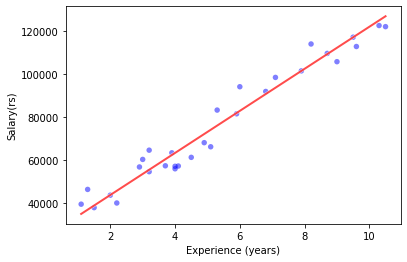

In [157]:
#plotting
thinkplot.Scatter(d1,d2,color="blue",alpha=0.5)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Experience (years)",
                 ylabel='Salary(rs)',legend=False)


In [158]:
#finding the residuals
def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res
res=Residuals(d1,d2,inter,slopes)
res


array([ 4528.80129076,  9435.63667252,  -993.52794571,   -87.43949129,
       -5676.60410952,  4231.31972667,  6761.73741755,  -898.42720068,
        9101.57279932, -3042.33874626,  1031.49663551, -7370.08567361,
       -6207.08567361, -7060.66798273, -6940.99721919, -4024.32645565,
       -7888.49107389,  7215.34430788,  -375.14954681, 11224.26814407,
        1201.60967114,  4803.86274379,    12.20427087,  9589.45734352,
         320.54579794, -6461.20112941,    37.88732501, -5273.69498411,
       -2360.77114792, -4834.93576615])

In [159]:

cdfs = [thinkstats2.Cdf(res)]
cdfs

[Cdf([-7888.49107389 -7370.08567361 -7060.66798273 -6940.99721919
  -6461.20112941 -6207.08567361 -5676.60410952 -5273.69498411
  -4834.93576615 -4024.32645565 -3042.33874626 -2360.77114792
   -993.52794571  -898.42720068  -375.14954681   -87.43949129
     12.20427087    37.88732501   320.54579794  1031.49663551
   1201.60967114  4231.31972667  4528.80129076  4803.86274379
   6761.73741755  7215.34430788  9101.57279932  9435.63667252
   9589.45734352 11224.26814407], [0.03333333 0.06666667 0.1        0.13333333 0.16666667 0.2
  0.23333333 0.26666667 0.3        0.33333333 0.36666667 0.4
  0.43333333 0.46666667 0.5        0.53333333 0.56666667 0.6
  0.63333333 0.66666667 0.7        0.73333333 0.76666667 0.8
  0.83333333 0.86666667 0.9        0.93333333 0.96666667 1.        ])]

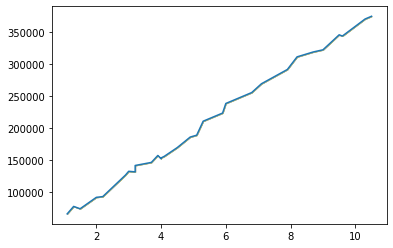

In [165]:
def confidence_interval(xs, intercept, slope, percent =90):
    fit_xs, fit_ys = Fitline(xs, intercept, slope)

    p = (100 - percent) / 200
    ci = p * np.std(fit_ys) / np.mean(fit_ys)

    plt.plot(fit_xs, fit_ys)
    plt.fill_between(fit_xs, (fit_ys-ci), (fit_ys+ci), color='blue', alpha=0.5)
    plt.fill_between(fit_xs, (fit_ys-2*ci), (fit_ys+2*ci), color='yellow', alpha=0.5)
    plt.show()
confidence_interval(d1,d2,inter,slopes)


In [161]:
from thinkstats2 import Var
def CoefDetermination(ys, res):
    return 1 -Var(res) / Var(ys)
CoefDetermination(d2,res)
inter, slope = least2_squares(d1,d2)
res = Residuals(d1,d2,inter, slope)
r2 =CoefDetermination(d2, res)
print(r2)

0.9558187846379871


In [168]:
rho=thinkstats2.Corr(d1, d2)
print('rho', np.round(rho,3))
print('R', np.round(np.sqrt(r2),3))    

rho 0.978
R 0.978


In [163]:
from thinkstats2 import Std
print('Std(ys)', Std(d2))
print('Std(res)', Std(res))

Std(ys) 26953.65024877583
Std(res) 5665.476179720797


In [166]:
from thinkstats2 import Mean
estimates = least2_squares(d1, d2)
def Summarize(estimates, actual=None):
    mean = Mean(estimates)
    stderr = Std(estimates, mu=actual)
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.ConfidenceInterval(90)
    print('mean, SE, CI', mean, stderr, ci)
Summarize(estimates)

mean, SE, CI 16918.30820006402 7142.4851089036 (9775.823091160422, 24060.793308967623)
